In [241]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
# import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

 .\myenv\Scripts\activate

In [252]:
df = pd.read_csv('cleaned.csv')

In [253]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Brand,Product,Month,Hour
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,8,12
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,5,22
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,4,7
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,3,22
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,3,15


In [254]:
df = df[['Price', 'Region','Category', 'Brand', 'Product', 'Month','Hour']]

In [255]:
def map_to_quarter(hour):
    if 0 <= hour <= 6:
        return 1  # Morning
    elif 7 <= hour <= 12:
        return 2  # Afternoon
    elif 13 <= hour <= 18:
        return 3  # Evening
    else:
        return 4  # Night

df['Hour'] = df['Hour'].apply(map_to_quarter)

In [256]:
df.head()

,Price,Region,Category,Brand,Product,Month,Hour
0,300.68,Europe,Electronics,ComfortLiving,Speaker,8,2
1,300.68,Asia,Electronics,ComfortLiving,Speaker,5,4
2,300.68,Europe,Electronics,ComfortLiving,Speaker,4,2
3,300.68,South America,Electronics,ComfortLiving,Speaker,3,4
4,300.68,Europe,Electronics,ComfortLiving,Speaker,3,3


In [257]:
trf1 = ColumnTransformer(
    [
        ("ordinal", OrdinalEncoder(dtype=int), ['Region', 'Brand', 'Category', 'Product'])
    ],
    remainder='passthrough'
)

# setting to get a pandas df
trf1.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(dtype=<class 'int'>),
                                 ['Region', 'Brand', 'Category', 'Product'])])

In [258]:
trf1.fit_transform(df)

,ordinal__Region,ordinal__Brand,ordinal__Category,ordinal__Product,remainder__Price,remainder__Month,remainder__Hour
0,1,2,2,15,300.68,8,2
1,0,2,2,15,300.68,5,4
2,1,2,2,15,300.68,4,2
3,3,2,2,15,300.68,3,4
4,1,2,2,15,300.68,3,3
...,...,...,...,...,...,...,...
995,3,4,2,14,459.86,10,2
996,2,4,2,14,459.86,6,1
997,2,4,2,14,459.86,4,3
998,0,4,2,14,459.86,9,2


C:\Users\arsha\AppData\Local\Temp\ipykernel_11412\3987622849.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='tab10', s=1)


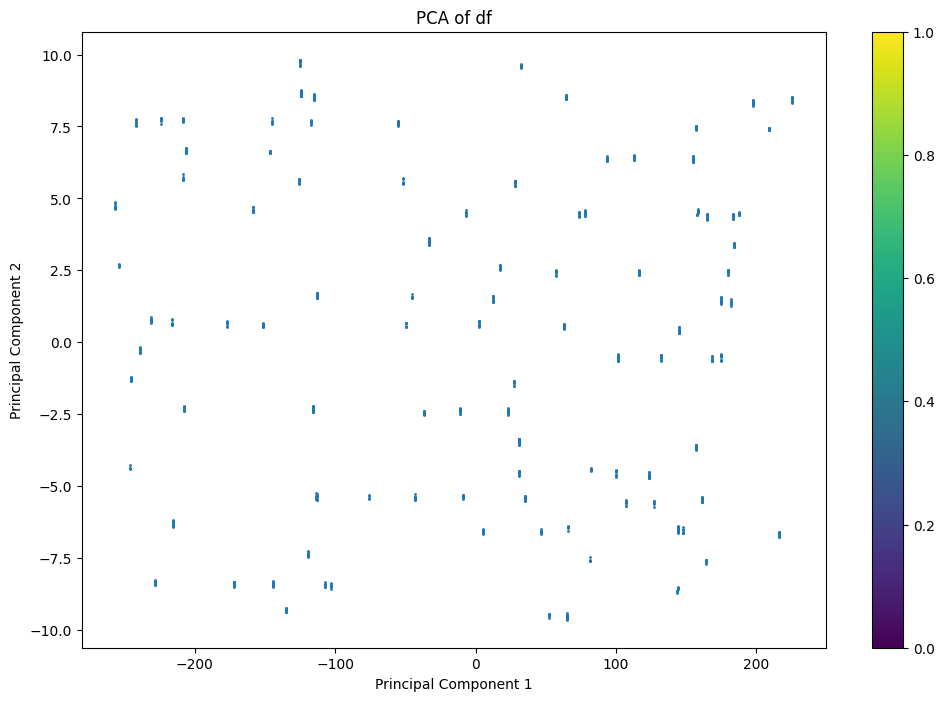

In [259]:
# Apply PCA for initial dimensionality reduction
df_pca = trf1.fit_transform(df)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_pca)

# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of df')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\arsha\AppData\Local\Temp\ipykernel_11412\1831497352.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='tab10', s=1)
c:\Users\arsha\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


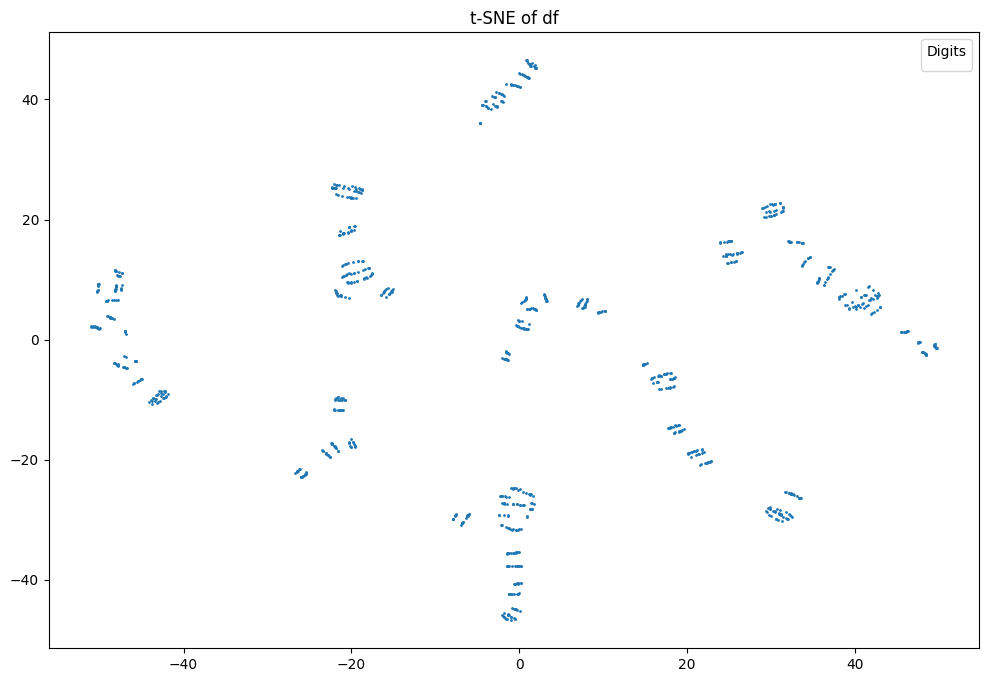

In [260]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(df_pca)

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of df')
plt.show()

### We'll apply DBSCAN coz above looks well seperated with density

In [261]:
df.head()

,Price,Region,Category,Brand,Product,Month,Hour
0,300.68,Europe,Electronics,ComfortLiving,Speaker,8,2
1,300.68,Asia,Electronics,ComfortLiving,Speaker,5,4
2,300.68,Europe,Electronics,ComfortLiving,Speaker,4,2
3,300.68,South America,Electronics,ComfortLiving,Speaker,3,4
4,300.68,Europe,Electronics,ComfortLiving,Speaker,3,3


In [262]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),[0, 1, 2, 3, 4])
])
trf2.set_output(transform='pandas')
# trf2.fit_transform(df)

ColumnTransformer(transformers=[('scale', MinMaxScaler(), [0, 1, 2, 3, 4])])

In [263]:
dbscan_model = DBSCAN(eps=0.34, min_samples=15)
# Combining transformations and DBSCAN in a pipeline
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('dbscan', dbscan_model)
])

df['cluster'] = pipe.fit_predict(df)
print(df.cluster.value_counts())
df.head()

cluster
-1     285
 2     243
 4      78
 1      76
 8      55
 3      48
 0      42
 5      39
 10     29
 9      28
 6      23
 11     21
 7      18
 12     15
Name: count, dtype: int64


,Price,Region,Category,Brand,Product,Month,Hour,cluster
0,300.68,Europe,Electronics,ComfortLiving,Speaker,8,2,0
1,300.68,Asia,Electronics,ComfortLiving,Speaker,5,4,0
2,300.68,Europe,Electronics,ComfortLiving,Speaker,4,2,0
3,300.68,South America,Electronics,ComfortLiving,Speaker,3,4,0
4,300.68,Europe,Electronics,ComfortLiving,Speaker,3,3,0


c:\Users\arsha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


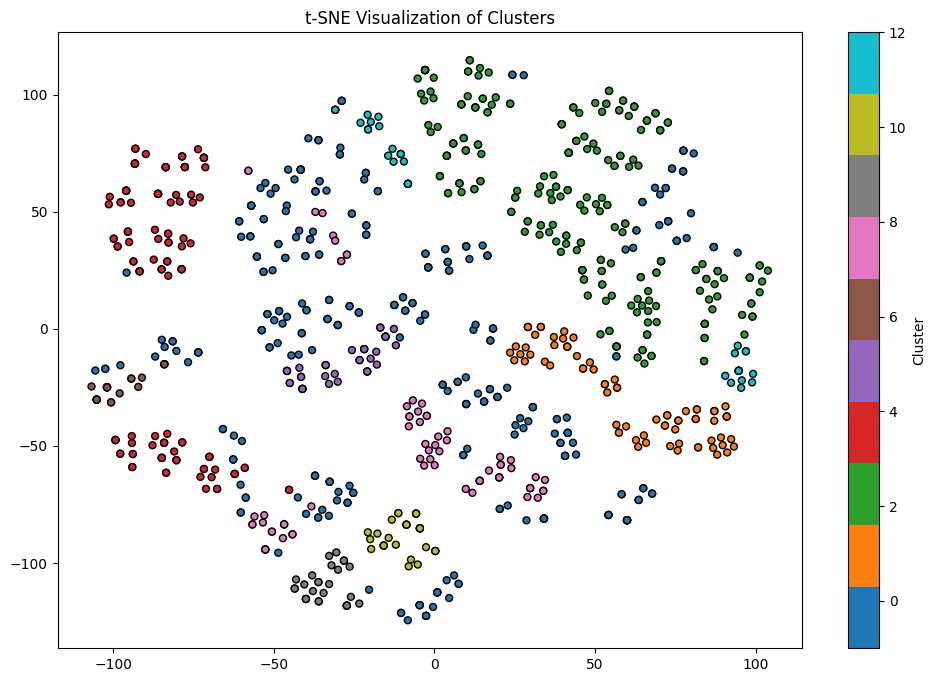

In [264]:
# Fit and transform data (excluding t-SNE)
df_transformed = pipe.named_steps['trf1'].transform(df)  # Encoding
df_transformed = pipe.named_steps['trf2'].transform(df_transformed)  # Scaling

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
df_tsne = tsne.fit_transform(df_transformed)  # Reduce to 2D


plt.figure(figsize=(12, 8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df['cluster'], cmap='tab10', edgecolor='k', s=25)
plt.title("t-SNE Visualization of Clusters")
plt.colorbar(label="Cluster")
plt.show()

In [265]:
X_filtered = df_transformed  # Features
labels_filtered = df['cluster']  # Cluster labels

db_index = davies_bouldin_score(X_filtered, labels_filtered)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 2.0612663475112556


### Experimenting with just price col getting scaled 

1. Starting again

In [266]:
df2 = pd.read_csv('cleaned.csv', usecols=['Price', 'Region','Category', 'Brand', 'Product', 'Month','Hour'])
df2.head()

,Price,Region,Category,Brand,Product,Month,Hour
0,300.68,Europe,Electronics,ComfortLiving,Speaker,8,12
1,300.68,Asia,Electronics,ComfortLiving,Speaker,5,22
2,300.68,Europe,Electronics,ComfortLiving,Speaker,4,7
3,300.68,South America,Electronics,ComfortLiving,Speaker,3,22
4,300.68,Europe,Electronics,ComfortLiving,Speaker,3,15


2. Applying Ordinal Encoding

In [267]:
df2 = trf1.fit_transform(df2)
df2.head()

,ordinal__Region,ordinal__Brand,ordinal__Category,ordinal__Product,remainder__Price,remainder__Month,remainder__Hour
0,1,2,2,15,300.68,8,12
1,0,2,2,15,300.68,5,22
2,1,2,2,15,300.68,4,7
3,3,2,2,15,300.68,3,22
4,1,2,2,15,300.68,3,15


3. Scaling only Price Column

In [268]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df2[['remainder__Price']])  # Scale only remainder__price
dbscan_model2 = DBSCAN(eps=0.15, min_samples=5)
cluster_labels = dbscan_model2.fit_predict(df_scaled)  # Use scaled data
df2['Cluster'] = cluster_labels
print(df2.Cluster.value_counts())
df2.head()


Cluster
0    583
2    210
3    135
1     72
Name: count, dtype: int64


,ordinal__Region,ordinal__Brand,ordinal__Category,ordinal__Product,remainder__Price,remainder__Month,remainder__Hour,Cluster
0,1,2,2,15,300.68,8,12,0
1,0,2,2,15,300.68,5,22,0
2,1,2,2,15,300.68,4,7,0
3,3,2,2,15,300.68,3,22,0
4,1,2,2,15,300.68,3,15,0


No noise! Perfect! Noww lets compute Davies-Bouldin Index to compare the results

4. Compute the score

In [269]:
db_index = davies_bouldin_score(df2.drop(columns=['Cluster']) , df2['Cluster'] )
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.4470408820021904


Now time for the real check The 'TSNE' Visualisation

c:\Users\arsha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


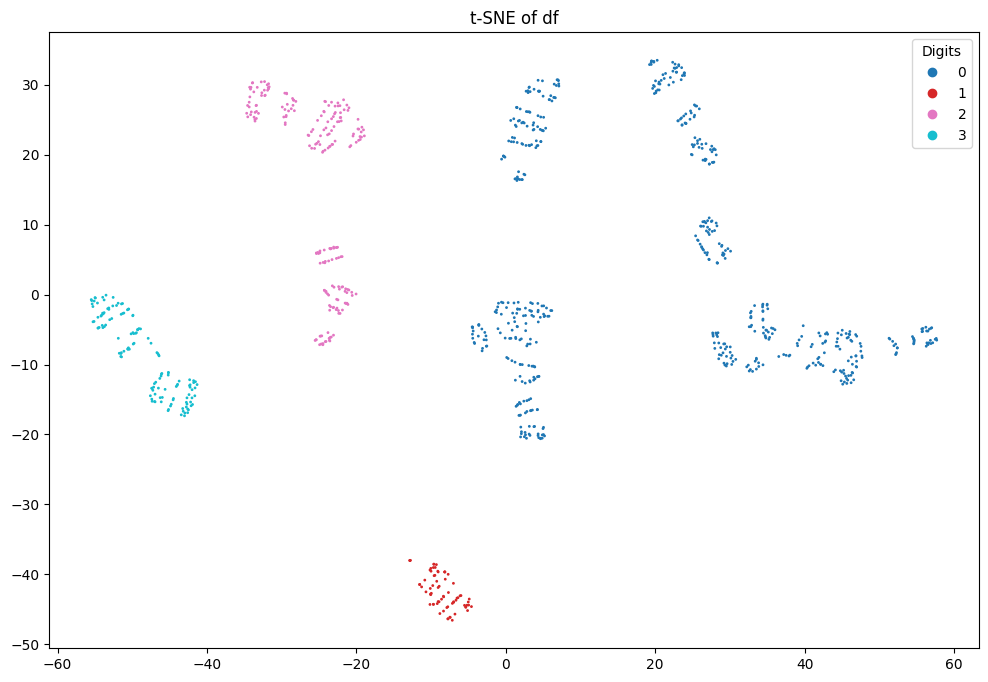

In [273]:
tsne2 = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne2 = tsne2.fit_transform(df2)

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=df2['Cluster'], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of df')
plt.show()

Great!

In [ ]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),['remainder__Price'])
])

dbscan_model2 = DBSCAN(eps=0.15, min_samples=5)

pipe2 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('dbscan', dbscan_model2)
])

df2['Cluster'] = pipe2.fit_predict(df2)
print(df2.Cluster.value_counts())
df2.head()